# Основы работы с количественными данными

*Алла Тамбовцева*

## Практикум 4.1. Обработка и визуализация количественных данных

[Charity Navigator](https://www.charitynavigator.org/about-us/our-methodology/ratings/#accordion-0f1da9ef58-item-57920c7dce) – благотворительная организация, которая занимается независимой оценкой некоммерческих организаций в США. На основе налоговых деклараций и информации с сайтов самих некоммерческих организаций организация формирует числовые индексы качества работы организаций, а затем – рейтинги на основе этих индексов. Два основных направления оценки:

* финансовое благополучие;
* подотчётность и прозрачность.

Итак, есть индекс финансового благополучия *Financial Score* и индекс подотчётности и прозрачности *Accountability & Transparency Score*, оба индекса измерены в шкале от 0 до 100, где большие значения соответствуют лучшему качеству работы организации. Также сформирован общий индекс *Score*, в состав которого входят *Financial Score* и *Accountability & Transparency Score*.

Итак, в файле `charity_data.csv` хранится информация по некоммерческим организациям США. Некоторые показатели в файле:

* `name`: название организации;
* `category`: профиль организации;
* `description`: описание организации;
* `motto`: девиз организации;
* `size`: размер организации;
* `state`: штат, в котором находится организация;
* `ascore`: индекс подотчётности и прозрачности;
* `fscore`: индекс финансового благополучия;
* `score`: общий индекс качества работы организации.

Подробнее о данных можно почитать на платформе [Kaggle](https://www.kaggle.com/datasets/katyjqian/charity-navigator-scores-expenses-dataset), именно оттуда этот файл был взят.

## Часть 1: загружаем и фильтруем данные

Импортируем библиотеку `pandas` для загрузки и обработки данных в табличном виде:

In [1]:
import pandas as pd

### Задача 1

Загрузите данные из файла `charity_data.csv` и сохраните их в датафрейм `data`.

In [2]:
data = pd.read_csv("charity_data.csv")

### Задача 2

Выведите «техническую» информацию по датафрейму `data`, включающую перечень столбцов, их типы и пропущенные значения.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8408 entries, 0 to 8407
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ascore         8408 non-null   float64
 1   category       8408 non-null   object 
 2   description    8408 non-null   object 
 3   ein            8408 non-null   object 
 4   tot_exp        8408 non-null   float64
 5   admin_exp_p    8408 non-null   float64
 6   fund_eff       8408 non-null   float64
 7   fund_exp_p     8408 non-null   float64
 8   program_exp_p  8408 non-null   float64
 9   fscore         8408 non-null   float64
 10  leader         8408 non-null   object 
 11  leader_comp    7972 non-null   float64
 12  leader_comp_p  7972 non-null   float64
 13  motto          8395 non-null   object 
 14  name           8408 non-null   object 
 15  tot_rev        8408 non-null   float64
 16  score          8408 non-null   float64
 17  state          8408 non-null   object 
 18  subcateg

### Задача 3

Выберите из датафрейма `data` столбцы `name`, `state`, `category`, `size`, `ascore`, `fscore`, `score` и сохраните их в новый датафрейм `char`.

*Подсказка:* пример выбора столбцов `A`, `B`, `C` из датафрейма `df`:

    df[["A", "B", "C"]]

In [4]:
char = data[["name", "state", "category", "size", 
             "ascore", "fscore", "score"]]

### Задача 4

Выведите на экран описательные статистики для всех числовых столбцов датафрейма `char`. Прокомментируйте полученные результаты для столбца `fscore`. 

In [5]:
char.describe()

,ascore,fscore,score
count,8408.000000,8408.000000,8408.000000
mean,90.724905,85.946183,86.866904
std,9.771194,9.755404,8.046299
min,28.000000,0.000000,14.480000
25%,89.000000,81.130000,83.260000
50%,93.000000,87.460000,88.310000
75%,97.000000,92.500000,92.020000
max,100.000000,100.000000,100.000000


**Комментарий.** Всего в таблице есть данные по 8408 организациям. В выборке есть организации, у которых финансовое благополучие оценивается на 0 (минимум равен 0). Это либо организации, по которым нет данных, позволяющих полноценно оценить финансовое благополучие, либо организации, где эти оценка неприменима. В выборке также есть организации, финансовое благополучие которых оценено на 100 из 100 (максимум равен 100). Среднее значение индекса равно 85.94, медианное – 87.46. Распределение индекса скошено влево, так как:

* среднее меньше медианы;
* 75% значений более 81.13, в то время как минимальное значение 0 (минимум сильно меньше нижнего квартиля 25%).

В выборке преобладают организации с большими значениями индекса, примерно от 90 до 100 (25% организаций со значениями индекса не ниже 81.13, 50% организаций со значениями индекса не ниже 87.46, 75% организаций со значениями индекса не ниже 92.5). 

### Задача 5

Выведите на экран описательные статистики для столбца `ascore` с делением на группы по размеру организаций (столбец `size`). Прокомментируйте полученные результаты.

In [6]:
char.groupby("size")["ascore"].describe()

,count,mean,std,min,25%,50%,75%,max
size,,,,,,,,
big,1450.0,94.350345,5.988719,55.0,92.0,96.0,100.0,100.0
mid,2908.0,92.436382,7.883640,44.0,89.0,93.0,100.0,100.0
small,4050.0,88.198025,11.295326,28.0,85.0,89.0,96.0,100.0


**Комментарий.** Лучше всего ситуация с подотчётностью и прозрачностью обстоит в больших организациях, в категории `big` самые высокие среднее и медианное значения, самый высокий минимум. Хуже всего – в маленьких организациях, в категории `small`. При этом в каждой группе есть организации, чья подотчётность и прозрачность оценена на максимально возможное значение 100 из 100. Значения индекса самые разнообразные в группе маленьких организаций (самое большое стандартное отклонение 11.29, самый большой размах, от 28 до 100), наименее разнообразные – в группе больших организаций (самое маленькое стандартное отклонение 5.98, самый маленький размах, от 55 до 100).

### Задача 6

Выведите уникальные значения и соответствующие им частоты для столбца `category`.

*Подсказка:* выберите столбец и примените к нему метод `.value_counts()`.

In [7]:
char["category"].value_counts()

Human Services                2379
Arts, Culture, Humanities     1218
Health                         847
Community Development          803
Education                      667
International                  610
Animals                        454
Religion                       450
Environment                    429
Human and Civil Rights         346
Research and Public Policy     205
Name: category, dtype: int64

**Комментарий.** Больше всего в выборке организаций профиля `Human Services` (социальное обеспечение), меньше всего – организаций с профилем деятельности `Research and Public Policy` (исследования и публичная политика).

### Задача 7

Выберите из датафрейма `char`:

* строки, соответствующие организациям с профилем деятельности «здравоохранение» (`Health` в `category`);
* строки, соответствующие организациям со значением индекса подотчётности и прозрачности выше 90;
* строки, соответствующие организациям с профилем деятельности «здравоохранение» со значением индекса подотчётности и прозрачности не ниже 80.

In [8]:
# 1
char[char["category"] == "Health"]

,name,state,category,size,ascore,fscore,score
29,"It's The Journey, Inc.",GA,Health,small,100.0,89.08,92.27
35,Israel Cancer Research Fund,NY,Health,mid,96.0,72.32,80.22
36,Israel Cancer Association USA,FL,Health,small,96.0,97.50,96.66
65,Interstitial Cystitis Association,VA,Health,small,94.0,70.87,78.96
71,International Waldenstrom's Macroglobulinemia ...,FL,Health,small,100.0,93.34,95.29
...,...,...,...,...,...,...,...
8137,Healing Hands Ministries,TX,Health,mid,82.0,90.30,85.54
8162,The Hastings Center,NY,Health,mid,89.0,95.31,91.54
8178,Harrisonburg Rockingham Free Clinic,VA,Health,mid,96.0,97.50,96.66
8197,Hands of Hope Tucson,AZ,Health,small,78.0,64.87,70.69


In [9]:
# 2
char[char["ascore"] > 90]

,name,state,category,size,ascore,fscore,score
0,1000 Friends of Oregon,OR,Environment,small,100.0,88.61,91.94
3,Utah Symphony & Opera,UT,"Arts, Culture, Humanities",big,93.0,91.03,91.95
4,Two Ten Footwear Foundation,MA,Human Services,mid,100.0,86.23,90.26
6,Quiet Hour Ministries,CA,Religion,small,100.0,64.70,75.03
8,Ozarks Food Harvest,MO,Human Services,big,100.0,96.42,97.46
...,...,...,...,...,...,...,...
8401,Yamhill Community Action Partnership,OR,Human Services,mid,96.0,95.00,95.47
8403,Yaddo,NY,"Arts, Culture, Humanities",small,92.0,71.94,79.36
8405,Yad Ezra,MI,Human Services,small,100.0,83.13,88.07
8406,Rawhide,WI,Human Services,big,100.0,95.64,96.91


In [10]:
#3
char[(char["category"] == "Health") & (char["ascore"] >= 80)]

,name,state,category,size,ascore,fscore,score
29,"It's The Journey, Inc.",GA,Health,small,100.0,89.08,92.27
35,Israel Cancer Research Fund,NY,Health,mid,96.0,72.32,80.22
36,Israel Cancer Association USA,FL,Health,small,96.0,97.50,96.66
65,Interstitial Cystitis Association,VA,Health,small,94.0,70.87,78.96
71,International Waldenstrom's Macroglobulinemia ...,FL,Health,small,100.0,93.34,95.29
...,...,...,...,...,...,...,...
8136,Healing the Children New Jersey,NJ,Health,small,100.0,80.00,85.85
8137,Healing Hands Ministries,TX,Health,mid,82.0,90.30,85.54
8162,The Hastings Center,NY,Health,mid,89.0,95.31,91.54
8178,Harrisonburg Rockingham Free Clinic,VA,Health,mid,96.0,97.50,96.66


### Задача 8

Выберите из датафрейма `char` строки, соответствующие профилям деятельности `Arts, Culture, Humanities` или `Education`. Сохраните их в датафрейм `chosen`. Во второй части практикума мы будем работать именно с датафреймом `chosen`.

In [11]:
chosen = char[(char["category"] == "Arts, Culture, Humanities") |
     (char["category"] == "Education")]

## Часть 2: визуализируем данные

Для более продвинутой визуализации средств библиотеки `pandas` нам будет недостаточно, поэтому импортируем модуль `pyplot` из библиотеки `matplotlib` для построения графиков. Он обычно импортируется с сокращённым названием `plt`:

In [12]:
from matplotlib import pyplot as plt

В этом модуле есть функция `subplots()`, которая создает один или несколько подграфиков внутри одного изображения. Так, мы можем создать заготовку для одного графика:

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

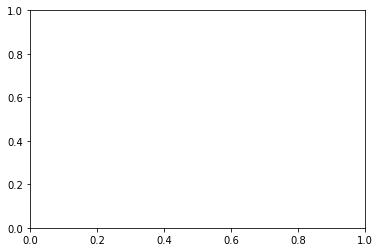

In [13]:
plt.subplots()

А можем создать сетку из графиков из одной строки и трёх столбцов, то есть поставить три графика в один ряд:

(<Figure size 432x288 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

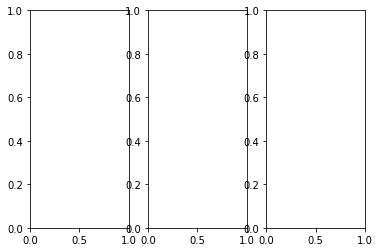

In [14]:
plt.subplots(nrows = 1, ncols = 3)

Пока это набор из пустых координатных плоскостей (массив из осей `AxesSubplot`) внутри одной картинки (изображение `Figure` фиксированного размера). При дальнейшей работе мы будем вносить изменения в каждую координатную плоскость `AxesSubplot`, а затем обновлённый результат в `Figure` выгружать в файл, например, с расширением `.jpeg` или `.png`.

Для этого сохраним результаты, возвращённые функцией, в переменные. Проделаем это на примере одного графика. Так как первый результат – это изображение, его часто называют `fig` (от *figure*). Второй результат – это набор осей, его обычно сокращают до `ax` (*axes*).

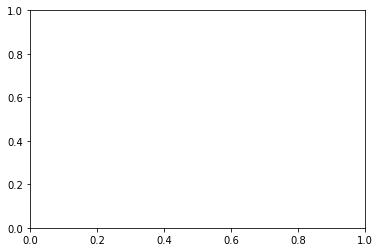

In [15]:
fig, ax = plt.subplots();

### Задача 1

Постройте гистограмму для индекса подотчётности и прозрачности, измените цвет заливки и цвет границ столбцов. 

*Подсказка:* для построения примените метод `.hist()` к осям `ax`, в качестве аргумента внутри метода укажите соответствующий столбец таблицы.

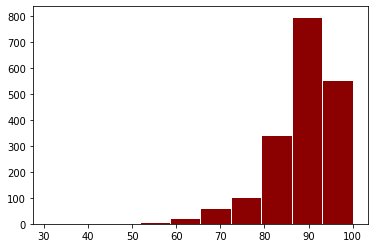

In [16]:
fig, ax = plt.subplots();

ax.hist(chosen["ascore"], color = "darkred", edgecolor = "white");

### Задача 2

Добавьте к гистограмме, созданной выше:

* подписи по горизонтальной и вертикальной осям (методы `.set_xlabel()` и `.set_ylabel()`);
* координатную сетку (метод `.grid()`).

Чтобы убрать координатную сетку под график (иначе она перекрывает гистограмму, что не очень красиво), можно применить метод `.set_axisbelow()` и указать внутри `True`.

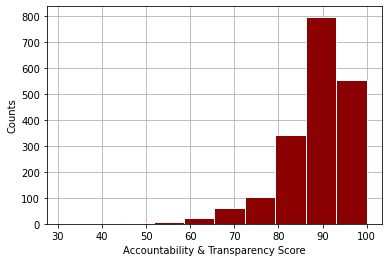

In [17]:
fig, ax = plt.subplots();

ax.hist(chosen["ascore"], color = "darkred", edgecolor = "white");

ax.set_xlabel("Accountability & Transparency Score");
ax.set_ylabel("Counts");

ax.grid();
ax.set_axisbelow(True);

### Задача 3

Измените число столбцов в построенной гистограмме, указав желаемое число столбцов в аргументе `bins` внутри метода `.hist()`. Число столбцов выберите самостоятельно.

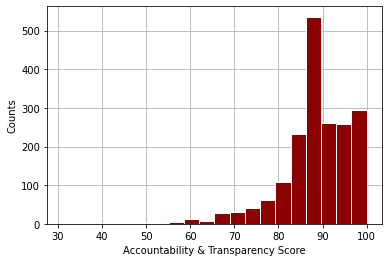

In [18]:
# делать меньше столбцов, чем выше, не стоит,
# иначе они будут совсем широкими, график будет слишком общим

fig, ax = plt.subplots();

# bins = 20
ax.hist(chosen["ascore"], color = "darkred", edgecolor = "white", bins = 20);

ax.set_xlabel("Accountability & Transparency Score");
ax.set_ylabel("Counts");

ax.grid();
ax.set_axisbelow(True);

# на графике ниже столбцов менее 20, так как на отрезке 30-50
# значений нет, там столбцы высоты 0, их не видно

### Задача 4

Измените шаг построенной гистограммы – сделайте его равным стандартному отклонению показателя. Для этого сохраните в переменные `min_`, `max_` и `std_` минимум, максимум и стандартное отклонение, посчитанные по выборке в столбце `ascore`, и подставьте `new_bins` в аргумент `bins`.

In [19]:
import numpy as np

min_ = chosen["ascore"].min()
max_ = chosen["ascore"].max()
std_ = chosen["ascore"].std()

# старт в min_, финиш в max_ + 1, 
# движемся с шагом std_ = 8 (примерно)

new_bins = np.arange(min_, max_ + 1, std_)

# в new_bins – границы столбцов
# построить столбец от 31 до 39.45, от 39.45 до 47.9, итд

print(new_bins)

[31.         39.45018587 47.90037174 56.35055761 64.80074348 73.25092935
 81.70111522 90.1513011  98.60148697]


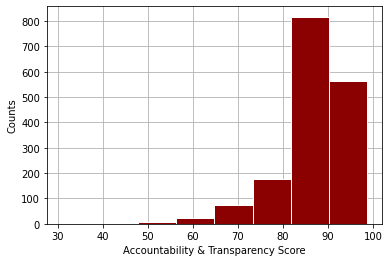

In [20]:
fig, ax = plt.subplots();

# bins = new_bins вместо числа
ax.hist(chosen["ascore"], color = "darkred", edgecolor = "white", bins = new_bins);

ax.set_xlabel("Accountability & Transparency Score");
ax.set_ylabel("Counts");

ax.grid();
ax.set_axisbelow(True);

### Задача 5
 
Экспортируйте полученный график с гистограммой в файл `ascore_hist.png`. Для экспорта примените метод `.savefig()` к изображению `fig` и укажите в качестве аргумента внутри название файла.

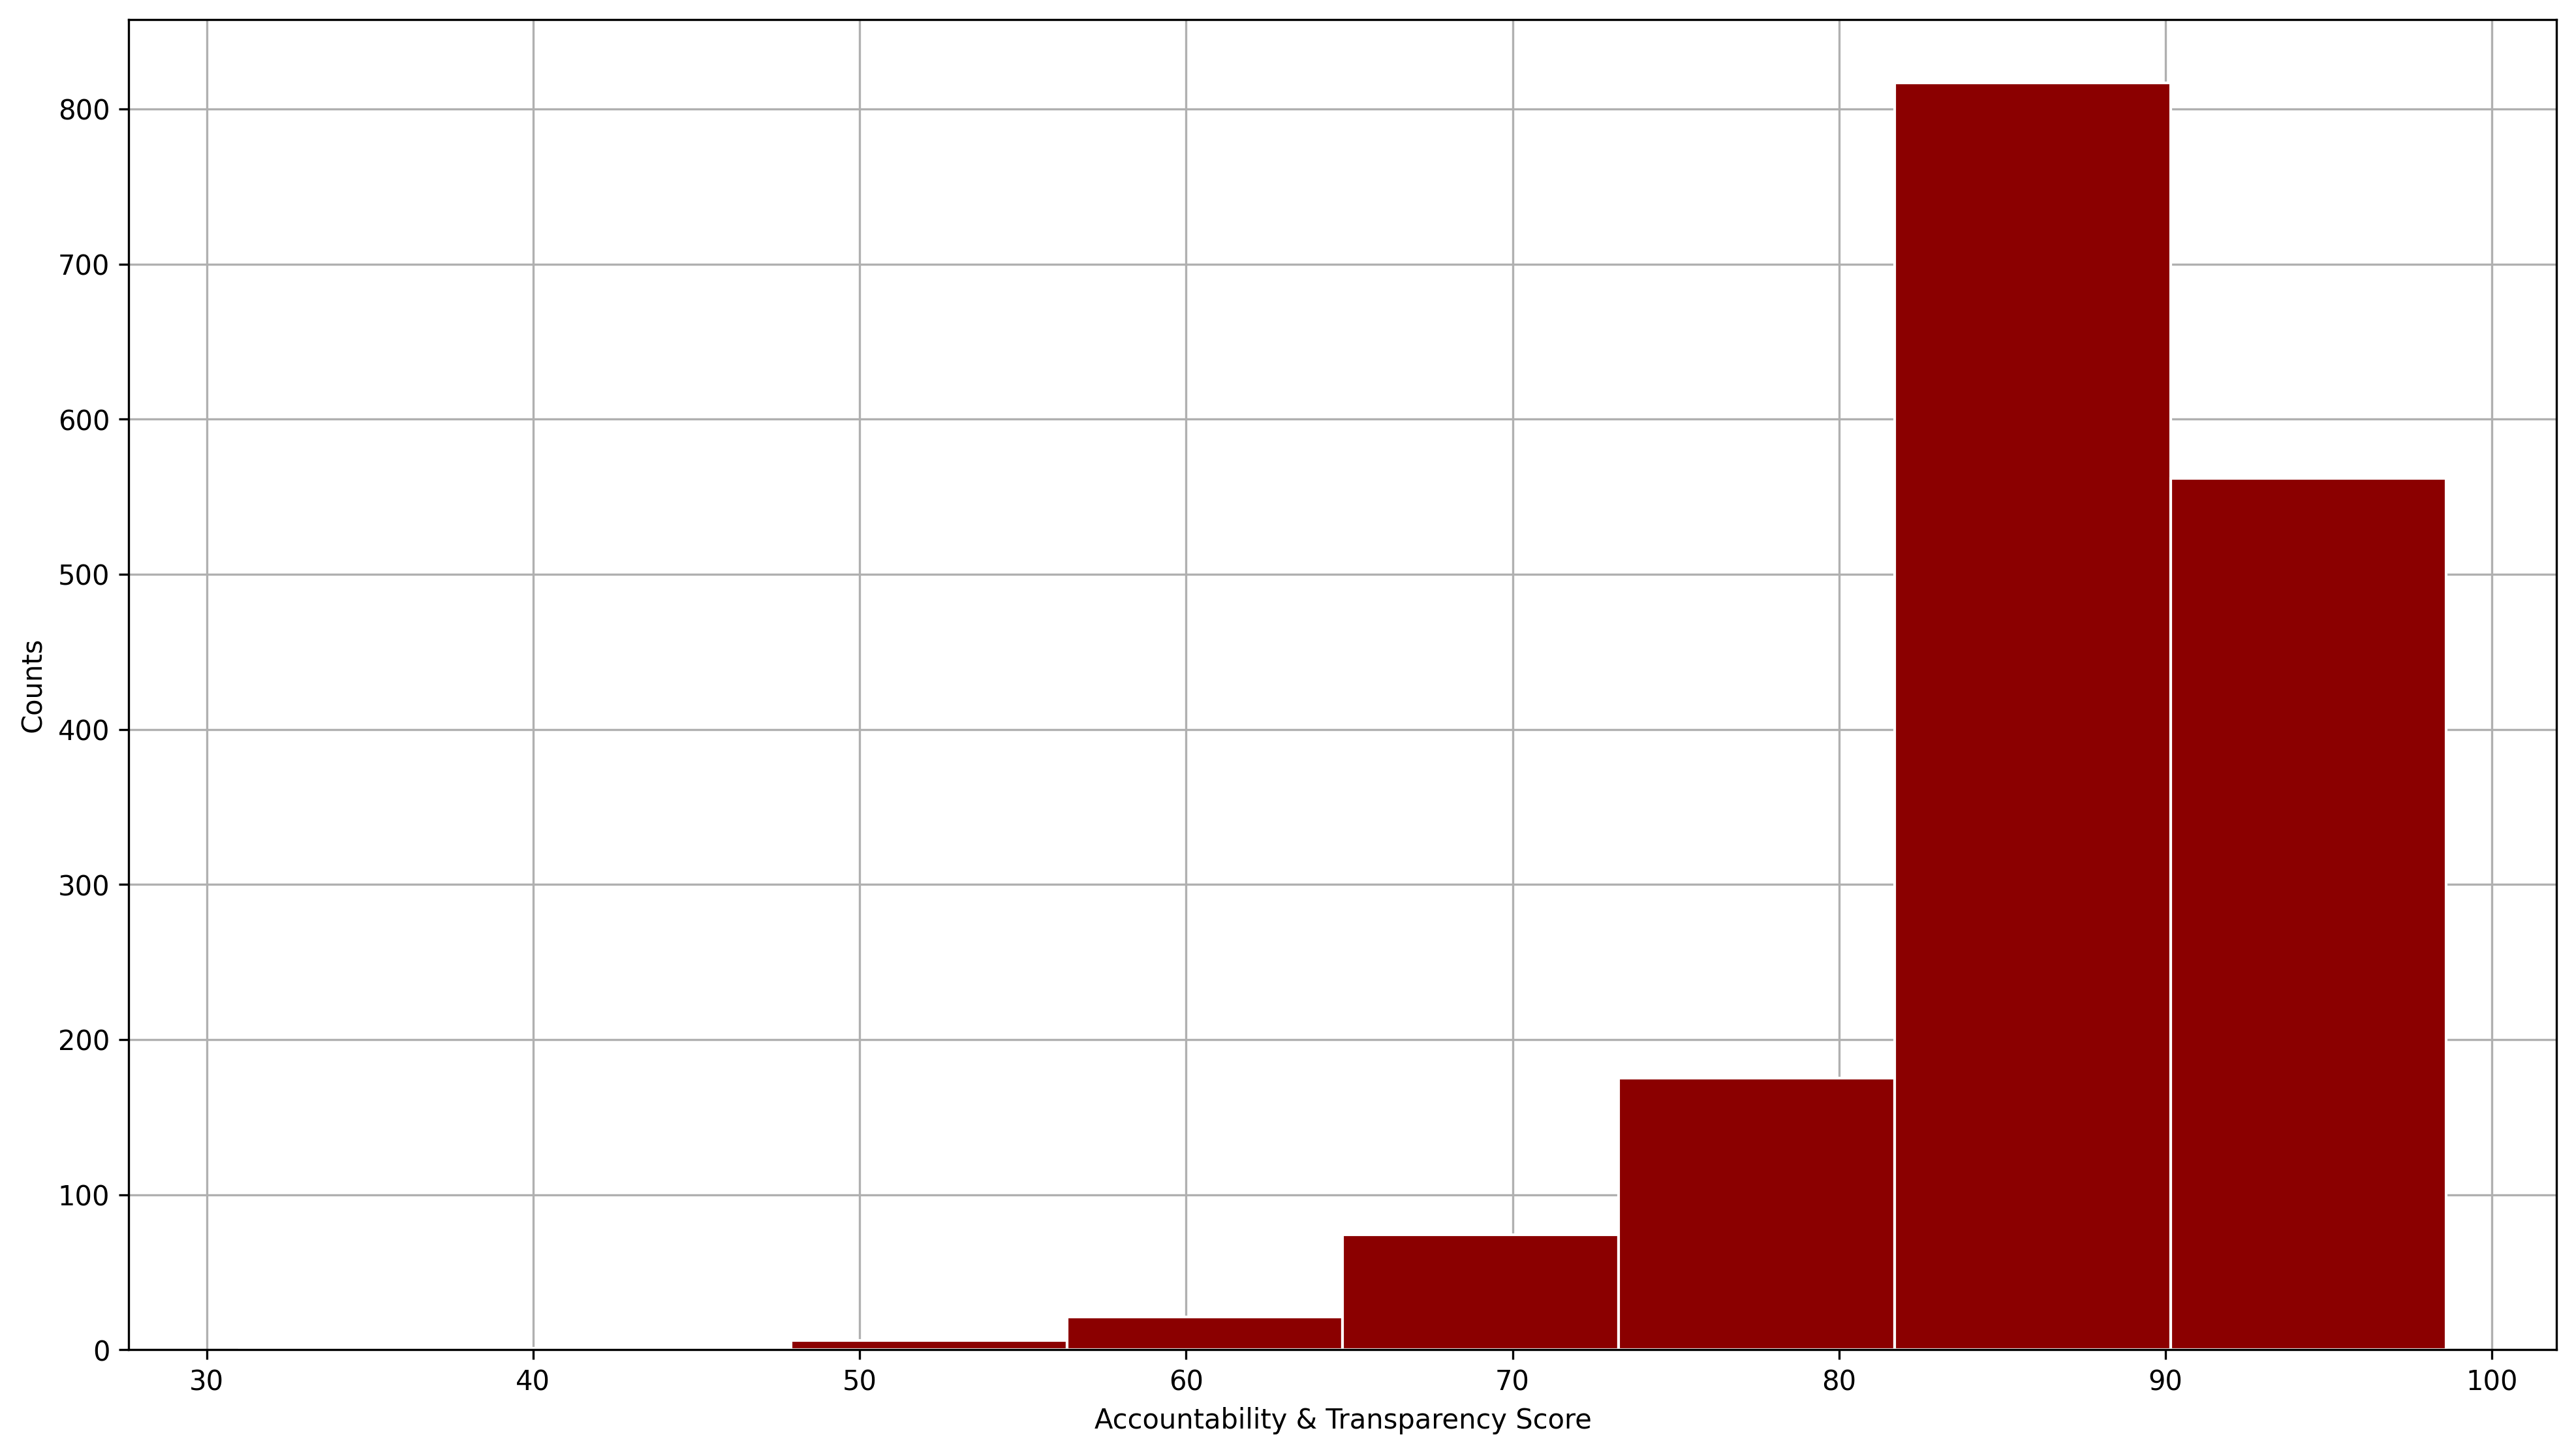

In [21]:
# тот же код, но в subplots() добавляем figsize и dpi
# figsize – размер в дюймах, здесь ширина 16, высота 9
# dpi – число точек на дюйм, разрешение, чем выше, 
# тем более четкий (менее пиксельный) рисунок

fig, ax = plt.subplots(figsize = (16, 9), dpi = 300);
ax.hist(chosen["ascore"], color = "darkred", edgecolor = "white", bins = new_bins);

ax.set_xlabel("Accountability & Transparency Score");
ax.set_ylabel("Counts");

ax.grid();
ax.set_axisbelow(True);

# экспортируем картинку
fig.savefig("ascore_hist.png")

### Задача 6

Постройте два графика в рамках одного изображения (два графика в одной строке):

* гистограмму для `ascore`;
* ящик с усами для `ascore`.

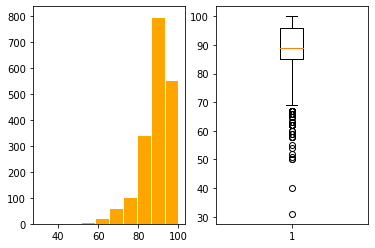

In [22]:
fig, axes = plt.subplots(nrows = 1, ncols = 2);

# в первые оси (индекс 0) помещаем гистограмму
# во вторые оси (индекс 1) помещаем ящик

axes[0].hist(chosen["ascore"], color = "orange", edgecolor = "white");
axes[1].boxplot(chosen["ascore"]);

### Задача 7

По аналогии с предыдущей задачей постройте в рамках одного изображения гистограммы (каждая гистограмма в своём окне) для следующих показателей: 

* индекс финансового благополучия (`fscore`);
* индекс подотчётности и прозрачности (`ascore`);
* общий индекс качества работы (`score`).

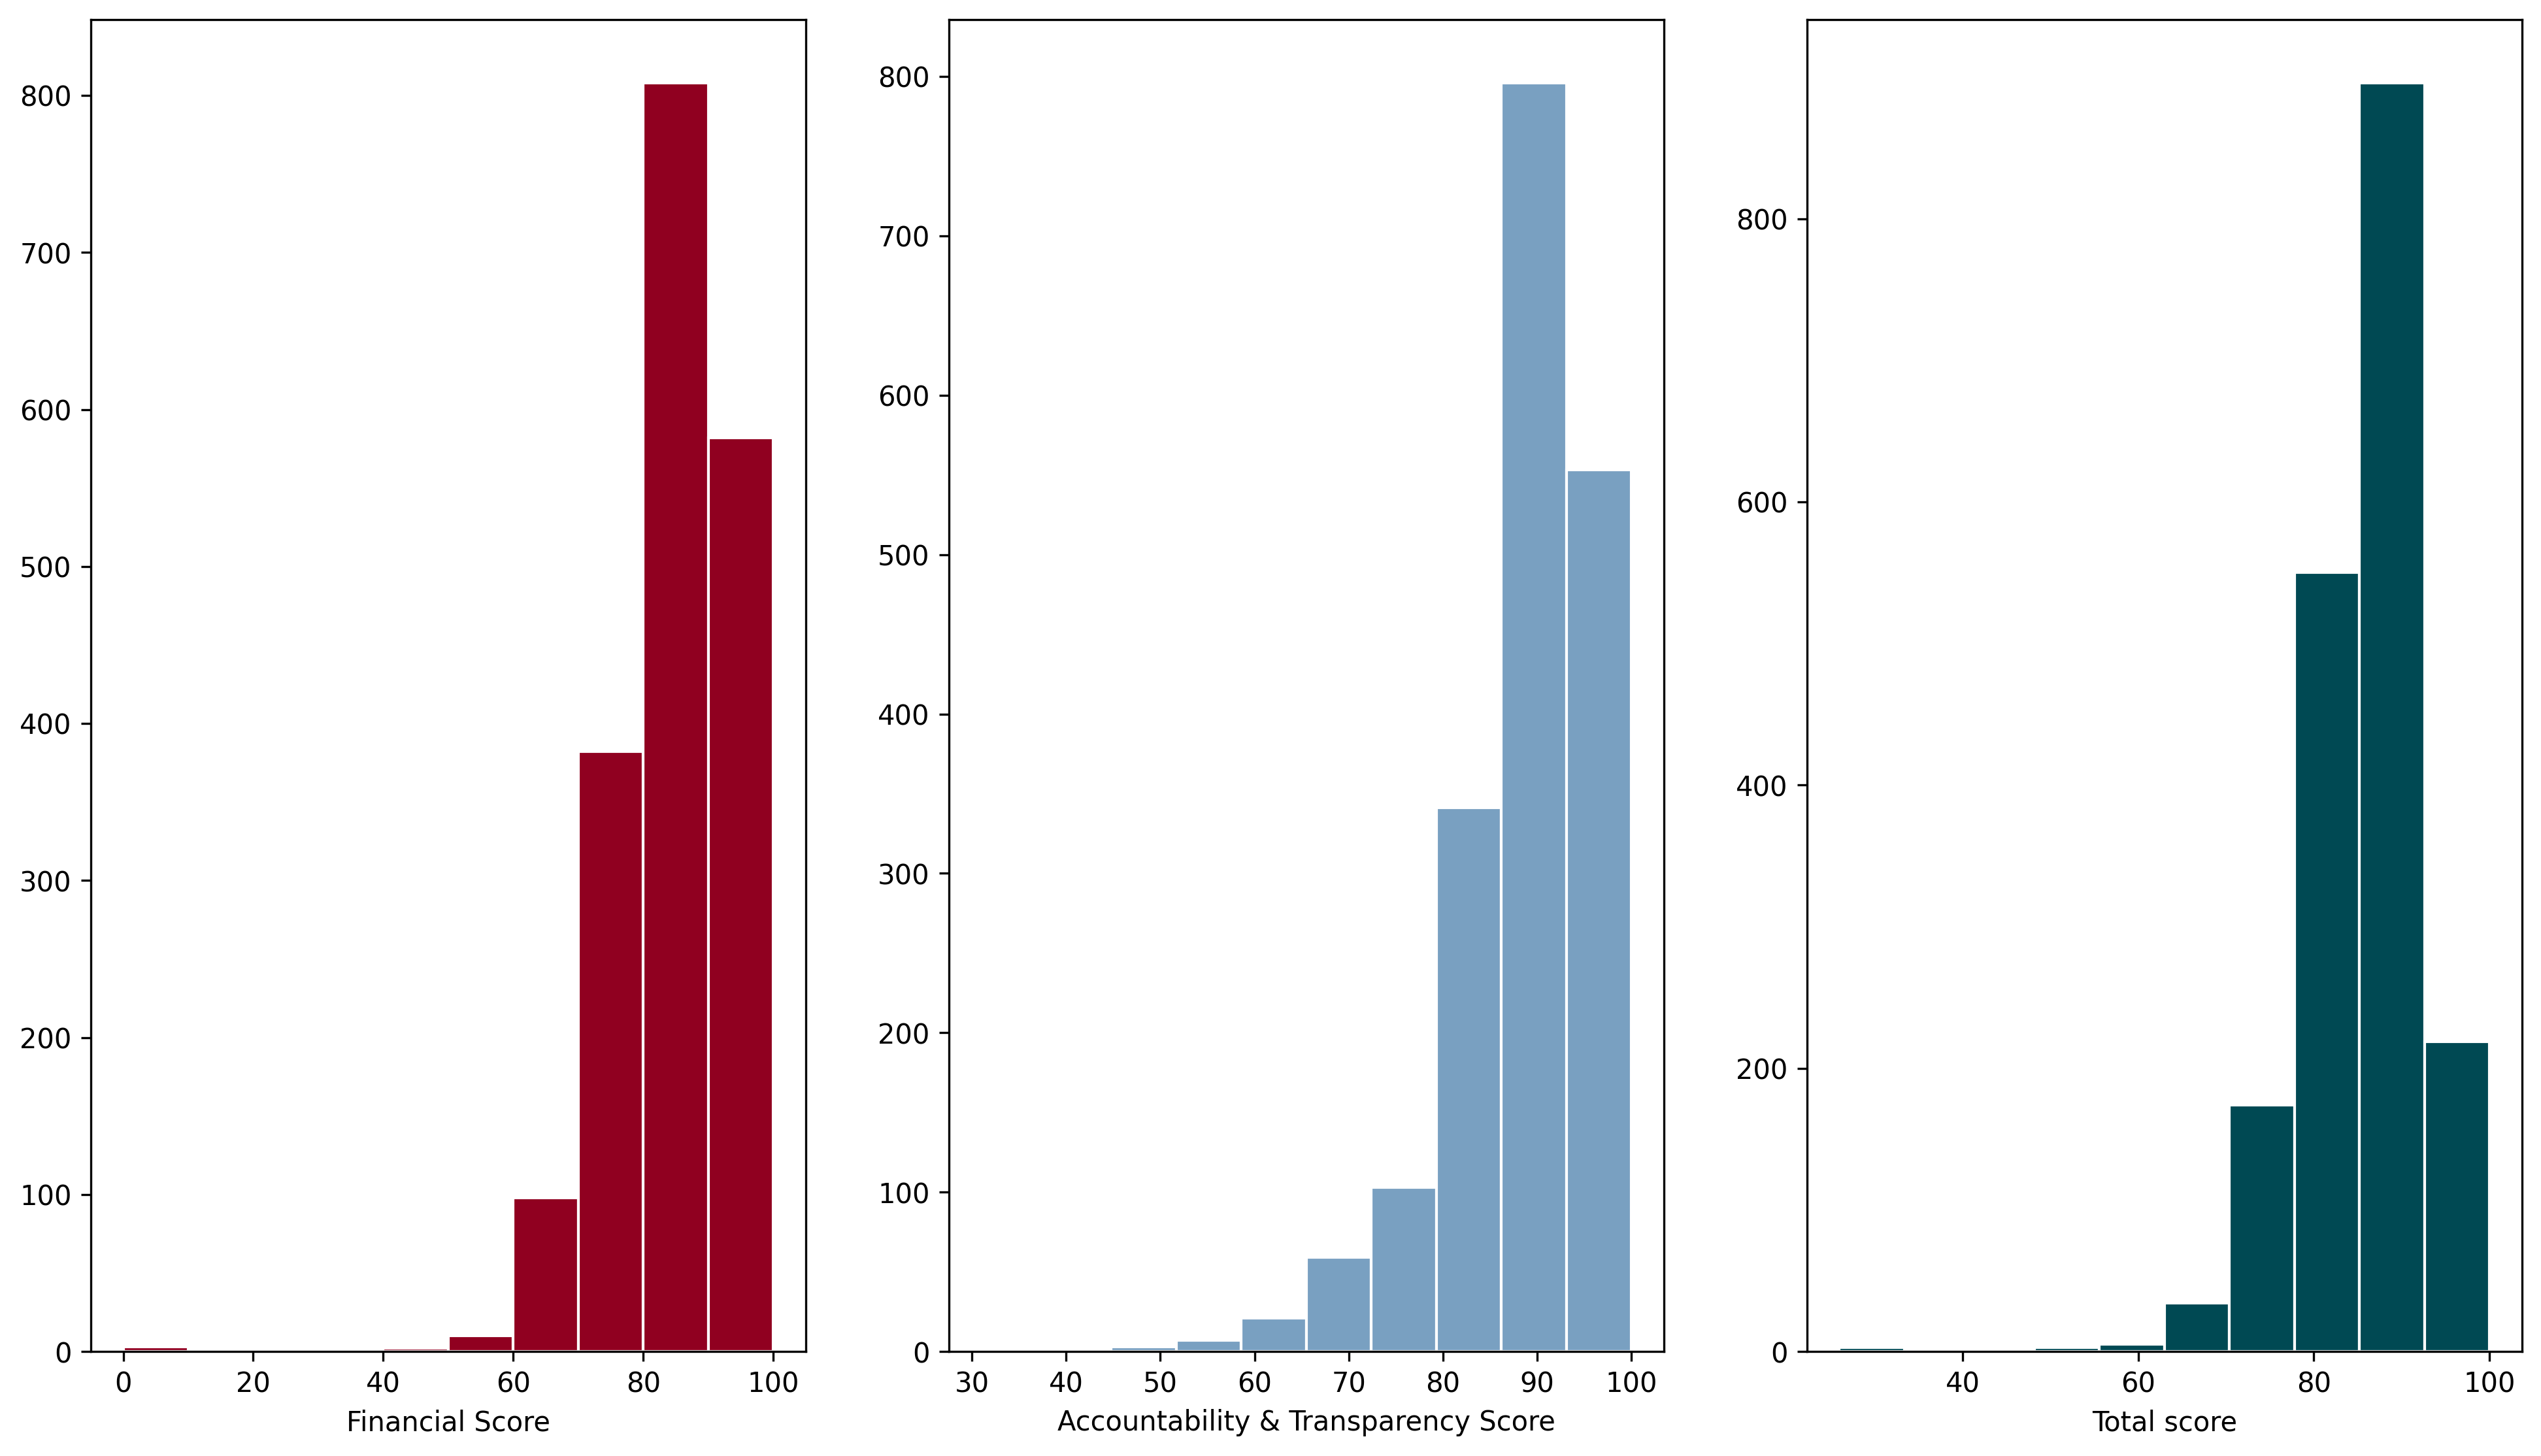

In [23]:
# уже 3 столбца, ncols = 3
# делаем график побольше

fig, axes = plt.subplots(nrows = 1, ncols = 3, 
                         figsize = (16, 9), dpi = 300);

# первые оси (с индексом 0)
axes[0].hist(chosen["fscore"], color = "#900020", edgecolor = "white");
axes[0].set_xlabel("Financial Score");

# вторые оси (с индексом 1)
axes[1].hist(chosen["ascore"], color = "#79A0C1", edgecolor = "white");
axes[1].set_xlabel("Accountability & Transparency Score");

# третьи оси (с индексом 2)
axes[2].hist(chosen["score"], color = "#004953", edgecolor = "white");
axes[2].set_xlabel("Total score");

# если захотим выгрузить график в файл, 
# выгружать будем всю картинку fig целиком

fig.savefig("three_h.png")

## Часть 3: знакомство с библиотекой `seaborn`

В этой части практикума мы познакомимся ещё с одной графической библиотекой, которая была разработана специально для визуализации данных и построения графиков, используемых в статистике и прикладном анализе данных. Это библиотека `seaborn`, она представляет собой надстройку над библиотекой `matplotlib`, которую мы в этом практикуме активно использовали.

Установим эту библиотеку:

In [ ]:
!pip install seaborn

Импортируем её с сокращённым названием `sns`:

In [24]:
import seaborn as sns

Установим тему всех последующих графиков (про темы см. [здесь](https://python-charts.com/seaborn/themes/)):

In [25]:
sns.set_theme(style = "whitegrid")

### Задача 1

Постройте гистограмму для индекса подотчётности и прозрачности, используя функцию `displot()` из библиотеки `seaborn`. При необходимости скорректируйте число или ширину столбцов.

*Подсказка:* внутри функции `displot()` в аргументе `data` указывается название датафрейма, а в аргументе `x` – название столбца; аргумент `bins` отвечает за число столбцов, а аргумент `binwidth` – за ширину столбцов.

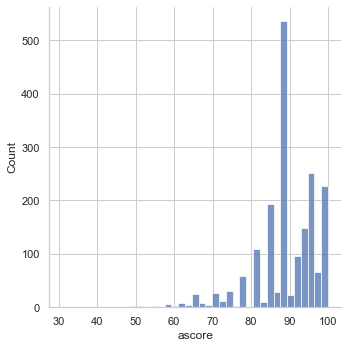

In [26]:
sns.displot(data = chosen, x = "ascore");

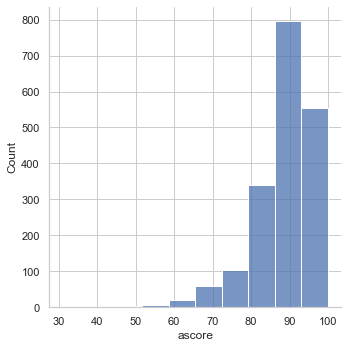

In [27]:
# если хотим скорректировать число столбцов
sns.displot(data = chosen, x = "ascore", bins = 10);

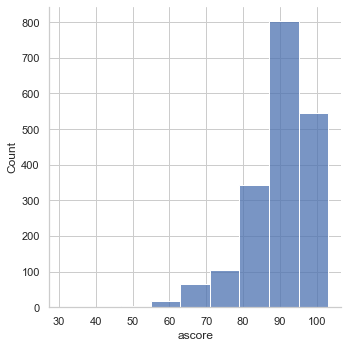

In [28]:
# если хотим скорректировать ширину столбцов,
# ширина столбца равна 8

sns.displot(data = chosen, x = "ascore", binwidth = 8);

### Задача 2

Постройте графики плотности индекса финансового благополучия с делением на группы по размеру организации.

*Подсказка:* в функцию `displot()` нужно добавить аргумент `kind="kde"` (оценка плотности вместо базовой гистограммы), в аргумент `hue` поместить название столбца – основания группировки; добавить заливку можно через аргумент `fill=True`.

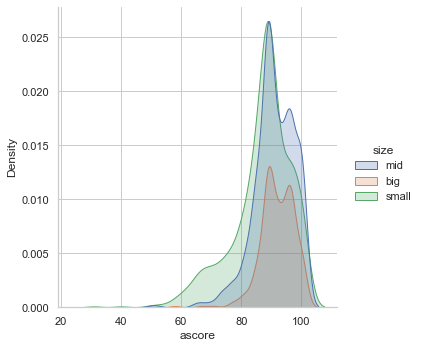

In [29]:
sns.displot(data = chosen, x = "ascore", 
            kind = "kde", hue = "size", fill = True);

### Задача 3

Постройте ящики с усами для индекса финансового благополучия с делением на группы по размеру организации, используя функцию `boxplot()` из библиотеки `seaborn`. 

*Подсказка:* внутри функции `boxplot()` в аргументе `data` указывается название датафрейма, в аргументе `y` – название столбца для визуализации, в аргументе `x` – название столбца, используемого как основание группировки.

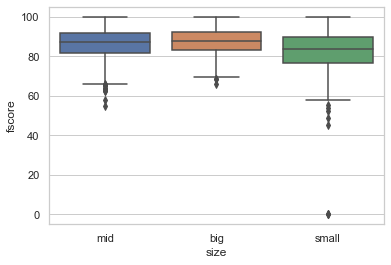

In [30]:
sns.boxplot(data = chosen, y = "fscore", x = "size");

**Примечание:** в более новой версии библиотеки ящики могут быть одного цвета, тогда в `hue` нужно тоже вписать название столбца для группировки `size`:

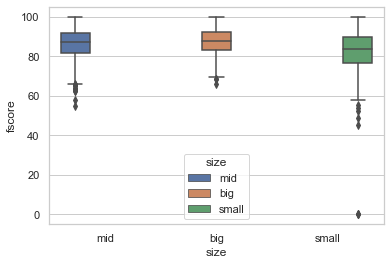

In [31]:
sns.boxplot(data = chosen, y = "fscore", x = "size", hue = "size");

**Дополнение для желающих.** А если в `x` и в `hue` вписать разные столбцы, мы получим деление на подгруппы в соответствии с `hue` внутри каждой группы в `x`. Это лучше один раз увидеть:

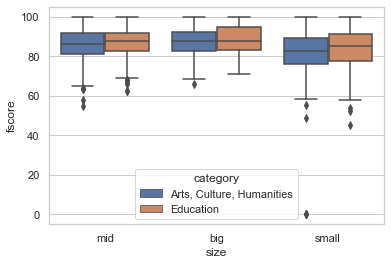

In [32]:
# по оси x – группы по размеру size
# внутри каждой группы дополнительное деление по category

sns.boxplot(data = chosen, y = "fscore", 
            x = "size", 
            hue = "category");

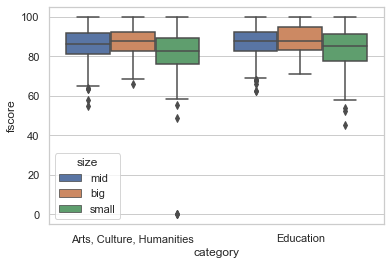

In [33]:
# наоборот
sns.boxplot(data = chosen, y = "fscore", 
            x = "category", 
            hue = "size");

**Ещё одно дополнение для желающих.** Иногда сглаженные графики плотности совмещают с ящиками с усами и получают скрипичные диаграммы (устоявшегося термина нет, на английском называют и *violin plot*, и *bean plot*, и даже *vase plot*):

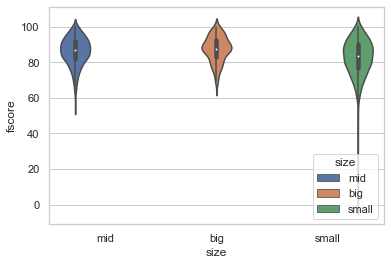

In [34]:
sns.violinplot(data = chosen, y = "fscore", x = "size", hue = "size");

График плотности распределения «отзеркаливается» для наглядности, внутри него помещается яшик с усами с отмеченной точкой медианой (иногда – средним).